In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

In [59]:
import matplotlib.pyplot as plt
import seaborn
sns.set_theme(style="darkgrid")

In [60]:
results = pd.read_csv("../results/Experiments.csv")
results

,process_entropy,number_of_traces,statespace_size,process_type,process_memory,med_ent_n_transitions,inter_arrival_time,process_stability_scale,resource_availability_p,resource_availability_n,...,RUN,Done,Failure,simuation_time_sec,num_traces,num_events,num_variants,avg_tracelen,min_tracelen,max_tracelen
0,min_entropy,500.0,5,memoryless,2.0,3.0,1.5,0.1,0.5,3.0,...,1,0,0,0.472330,500,2500,1,5.000,5,5
1,med_entropy,500.0,5,memoryless,2.0,3.0,1.5,0.1,0.5,3.0,...,2,0,0,0.526467,500,2889,295,5.778,1,39
2,max_entropy,500.0,5,memoryless,2.0,3.0,1.5,0.1,0.5,3.0,...,3,0,0,0.509581,500,2818,340,5.636,1,36
3,min_entropy,500.0,10,memoryless,2.0,3.0,1.5,0.1,0.5,3.0,...,4,0,0,0.766346,500,5000,1,10.000,10,10
4,med_entropy,500.0,10,memoryless,2.0,3.0,1.5,0.1,0.5,3.0,...,5,0,0,0.673480,500,4199,371,8.398,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,med_entropy,500.0,5,memory,4.0,5.0,1.5,0.1,0.5,3.0,...,956,0,0,30.331709,500,4448,252,8.896,1,84
956,max_entropy,500.0,5,memory,4.0,5.0,1.5,0.1,0.5,3.0,...,957,0,0,32.523269,500,2794,336,5.588,1,32
957,min_entropy,500.0,10,memory,4.0,5.0,1.5,0.1,0.5,3.0,...,958,0,0,1.693091,500,5000,1,10.000,10,10
958,med_entropy,500.0,10,memory,4.0,5.0,1.5,0.1,0.5,3.0,...,959,0,0,397.346780,500,6790,418,13.580,1,74


In [61]:
results.process_type.replace(['memory', 'memoryless'], ["Memory", "Memoryless"], inplace=True)

In [62]:
print("Simulation time in minutes:",np.sum(results.simuation_time_sec)/60)

Simulation time in minutes: 879.3092726866404


In [63]:
pd.pivot_table(results,
                values='max_tracelen', 
                index=['process_entropy'], 
                columns=['process_type'],
                            aggfunc=[np.max,
                                     np.min,
                                     #len,
                                     np.mean])

amax              amin                 mean           
process_type    Memory Memoryless Memory Memoryless    Memory Memoryless
process_entropy                                                         
max_entropy         91        141     23         27  53.36875     54.750
med_entropy       1336        137      1         16  72.07500     40.025
min_entropy         10         10      5          5   7.50000      7.500

In [64]:
whisker = 1.5
lw=0.5
w = 1

<AxesSubplot:xlabel='process_entropy', ylabel='simuation_time_sec'>

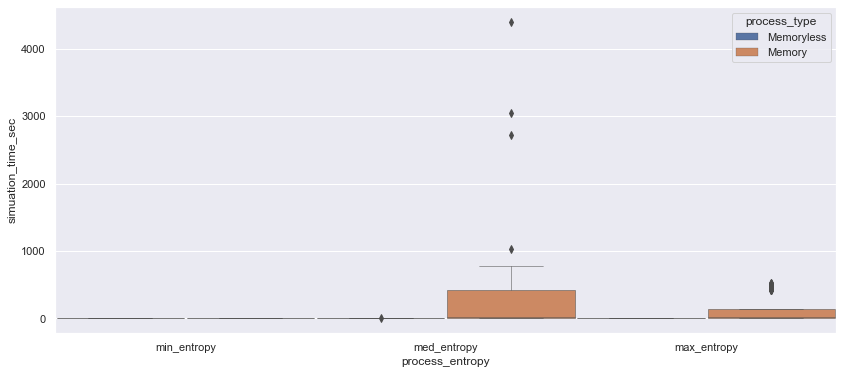

In [65]:
sns.boxplot(x='process_entropy',
            y='simuation_time_sec',
            hue='process_type',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
           data=results)

<AxesSubplot:xlabel='process_entropy', ylabel='num_traces'>

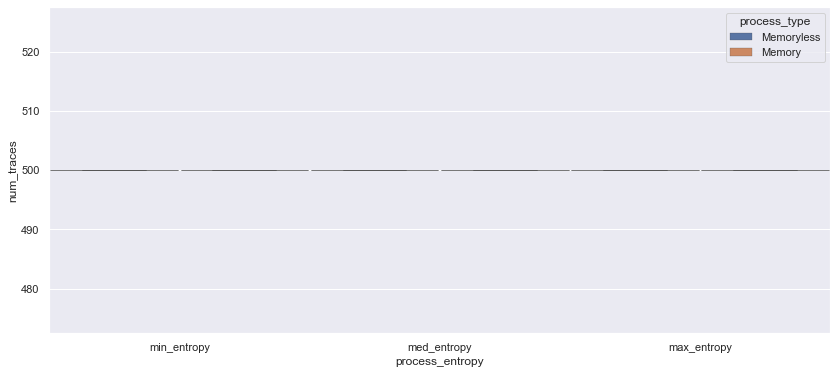

In [66]:
sns.boxplot(x='process_entropy',
            y='num_traces',
            hue='process_type',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
           data=results)

<AxesSubplot:xlabel='process_entropy', ylabel='avg_tracelen'>

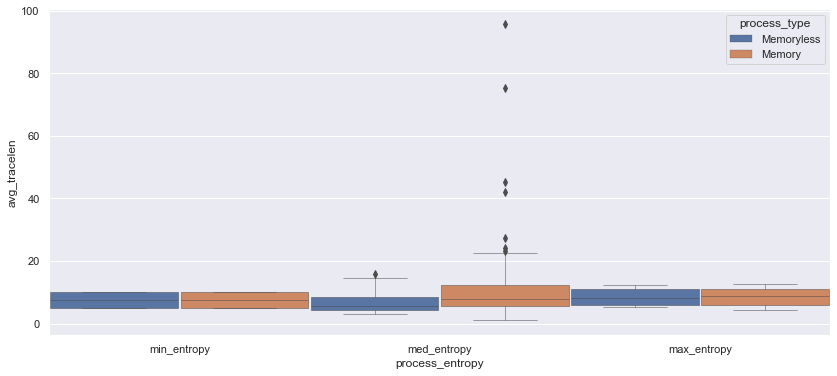

In [67]:
sns.boxplot(x='process_entropy',
            y='avg_tracelen',
            hue='process_type',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
           data=results)

<AxesSubplot:xlabel='process_entropy', ylabel='max_tracelen'>

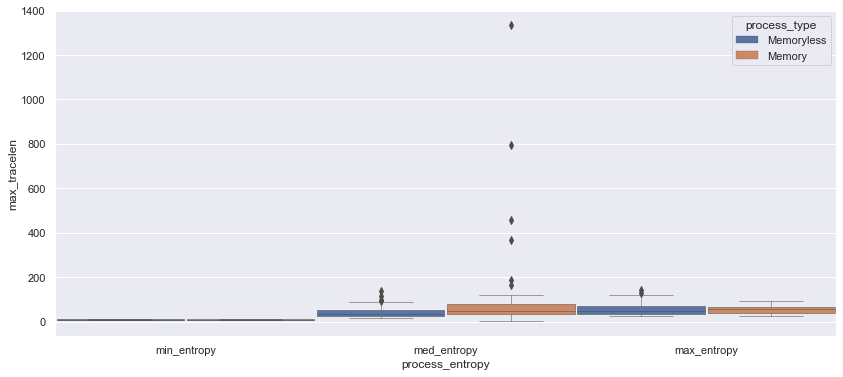

In [68]:
sns.boxplot(x='process_entropy',
            y='max_tracelen',
            hue='process_type',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
           data=results)

<AxesSubplot:xlabel='process_entropy', ylabel='num_variants'>

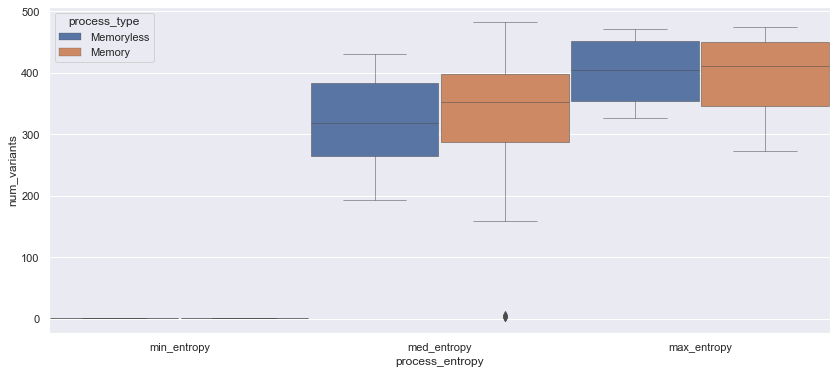

In [69]:
sns.boxplot(x='process_entropy',
            y='num_variants',
            hue='process_type',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
           data=results)

<AxesSubplot:xlabel='process_entropy', ylabel='num_events'>

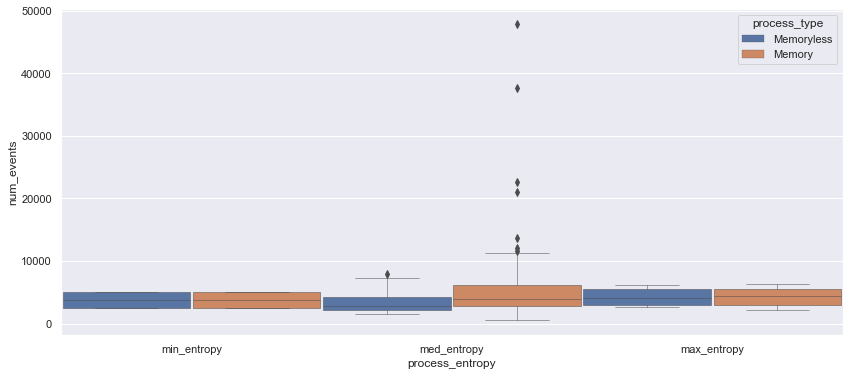

In [70]:
sns.boxplot(x='process_entropy',
            y='num_events',
            hue='process_type',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
           data=results)

# Simulation time

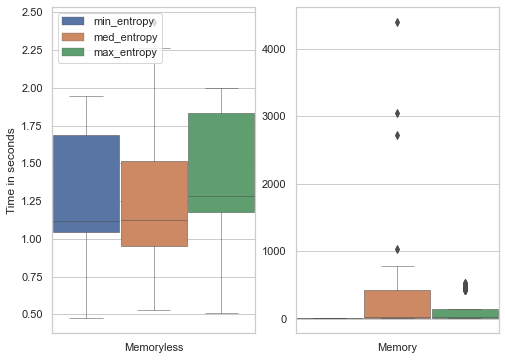

In [71]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2)

whisker = 1.5

lw = 0.5
w = 1

"""
subsetting
"""


entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "memory" #process_type

"""
Maximum entropy
"""

sns.boxplot(x='process_type',
            y='simuation_time_sec',
            hue='process_entropy',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
              data=results.loc[results.process_type == "Memoryless"], 
              ax=ax[0])

sns.boxplot(x='process_type',
            y='simuation_time_sec',
            hue='process_entropy',
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
              data=results.loc[results.process_type == "Memory"], 
              ax=ax[1])


ax[0].set(ylabel='Time in seconds', xlabel='', title="")#, ylim=[0,1100])
ax[0].legend(loc='upper left')

ax[1].set(ylabel='', xlabel='', title="")#, ylim=[0,1100])
ax[1].legend([],[], frameon=False)

plt.savefig('Simulation_durations.png', dpi=200, bbox_inches = "tight")

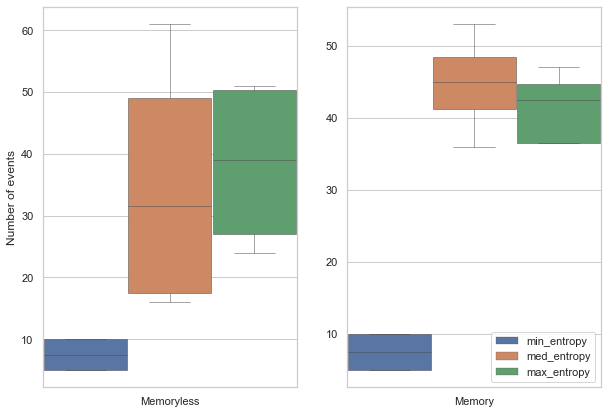

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(10, 7)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2)

whisker = 1.5

lw=0.5
w = 1

entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "memory" #process_type

"""
Maximum entropy
"""

sns.boxplot(x='process_type',
            y='max_tracelen',
            hue='process_entropy',
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=results.loc[results.process_type == "Memoryless"], 
              ax=ax[0])

sns.boxplot(x='process_type',
            y='max_tracelen',
            hue='process_entropy',
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=results.loc[results.process_type == "Memory"], 
              ax=ax[1])


ax[0].set(ylabel='Number of events', xlabel='', title="")#, ylim=[0,1100])
ax[0].legend([],[], frameon=False)

ax[1].set(ylabel='', xlabel='', title="")#, ylim=[0,1100])
ax[1].legend(loc='lower right')

plt.savefig('max_trace_lengths.png', dpi=200, bbox_inches = "tight")

# Other plots

In [15]:
results.head()

,process_entropy,number_of_traces,statespace_size,process_type,process_memory,med_ent_n_transitions,inter_arrival_time,process_stability_scale,resource_availability_p,resource_availability_n,...,RUN,Done,Failure,simuation_time_sec,num_traces,num_events,num_variants,avg_tracelen,min_tracelen,max_tracelen
0,min_entropy,100.0,5,Memoryless,4.0,3.0,1.5,0.1,0.5,3.0,...,1,0,0,0.109266,100,500,1,5.00,5,5
1,med_entropy,100.0,5,Memoryless,4.0,3.0,1.5,0.1,0.5,3.0,...,2,0,0,0.090394,100,340,53,3.40,1,18
2,max_entropy,100.0,5,Memoryless,4.0,3.0,1.5,0.1,0.5,3.0,...,3,0,0,0.112743,100,531,79,5.31,1,28
3,min_entropy,100.0,10,Memoryless,4.0,3.0,1.5,0.1,0.5,3.0,...,4,0,0,0.167790,100,1000,1,10.00,10,10
4,med_entropy,100.0,10,Memoryless,4.0,3.0,1.5,0.1,0.5,3.0,...,5,0,0,0.176317,100,1155,89,11.55,1,61


In [16]:
results.columns.tolist()

['process_entropy',
 'number_of_traces',
 'statespace_size',
 'process_type',
 'process_memory',
 'med_ent_n_transitions',
 'inter_arrival_time',
 'process_stability_scale',
 'resource_availability_p',
 'resource_availability_n',
 'resource_availability_m',
 'activity_duration_lambda_range',
 'Deterministic_offset_W',
 'Deterministic_offset_u',
 'model_pipeline',
 'num_replications',
 'RUN',
 'Done',
 'Failure',
 'simuation_time_sec',
 'num_traces',
 'num_events',
 'num_variants',
 'avg_tracelen',
 'min_tracelen',
 'max_tracelen']

In [72]:
results["RUN"] = results["RUN"]-1

for run in results.RUN:
    #get filename strings
    process_entropy = results.loc[results.RUN==run].process_entropy.values[0]
    process_type = results.loc[results.RUN==run].process_type.values[0]
    
    statespace_size = results.loc[results.RUN==run].statespace_size.values[0] 
    transitions = results.loc[results.RUN==run].med_ent_n_transitions.values[0] 
    process_type = results.loc[results.RUN==run].process_type.values[0] 
    number_of_traces = results.loc[results.RUN==run].number_of_traces.values[0] 
    
    #load eventlog
    df = pd.read_csv("../results/"+str(run)+"_Eventlog_"+process_entropy+"_"+process_type+".csv")
    
    prefix = pd.DataFrame(df['activity_no'].value_counts())
    prefix["event_no"] = df['activity_no'].value_counts().index
    prefix["trace_length"] = len(df['activity_no'].value_counts().index)
    
    prefix["transitions"] = transitions
    prefix["process_entropy"] = process_entropy
    prefix["process_type"] = process_type
    prefix["statespace_size"] = statespace_size
    prefix["number_of_traces"] = number_of_traces
    
    if run == results.RUN[0]:
        prefix_all = prefix
    else:
        prefix_all = pd.concat([prefix_all, prefix],axis=0,ignore_index=True)

prefix_all.to_csv("../results/prefix_all.csv",index=False)

In [73]:
#rename
prefix_all.rename(columns={'activity_no': 'freq',
                            'transitions': 'num_transitions'},
                          inplace=True)

In [74]:
prefix_all.head()

,freq,event_no,trace_length,num_transitions,process_entropy,process_type,statespace_size,number_of_traces
0,500,1,5,3.0,min_entropy,Memoryless,5,500.0
1,500,2,5,3.0,min_entropy,Memoryless,5,500.0
2,500,3,5,3.0,min_entropy,Memoryless,5,500.0
3,500,4,5,3.0,min_entropy,Memoryless,5,500.0
4,500,5,5,3.0,min_entropy,Memoryless,5,500.0


# Prefixes by entropy and process type

C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\AppData\Local\Temp\ipykernel_39100\474543403.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


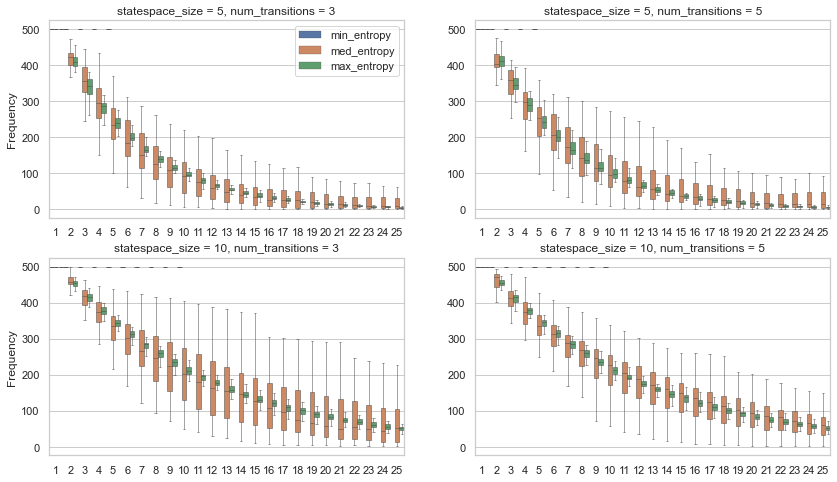

In [78]:

sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2)

whisker = 1.5

lw=0.5
w = 1

"""
subsetting
"""

prefix25 = prefix_all.loc[prefix_all.event_no < 26] 
#prefix25 = prefix25.loc[prefix25.number_of_traces == 100] 

entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "Memory" #process_type

"""
Maximum entropy
"""
prefix_plot = prefix25.loc[prefix25.statespace_size == 5]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[0,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[0,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[0,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 5, num_transitions = 3")#, ylim=[0,110])
ax[0,0].legend(loc='upper right')
ax[0,1].set(ylabel='', xlabel='', title="statespace_size = 5, num_transitions = 5")#, ylim=[0,110])
ax[0,1].legend([],[], frameon=False)





"""
Medium entropy
"""

prefix_plot = prefix25.loc[prefix25.statespace_size == 10]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[1,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[1,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[1,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 10, num_transitions = 3")#, ylim=[0,110])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(ylabel='', xlabel='', title="statespace_size = 10, num_transitions = 5")#, ylim=[0,110])
ax[1,1].legend([],[], frameon=False)




#plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

plt.savefig("event_frequency_vs_memory.png", dpi=200, bbox_inches = "tight")

fig.show()

C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\AppData\Local\Temp\ipykernel_39100\73475279.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


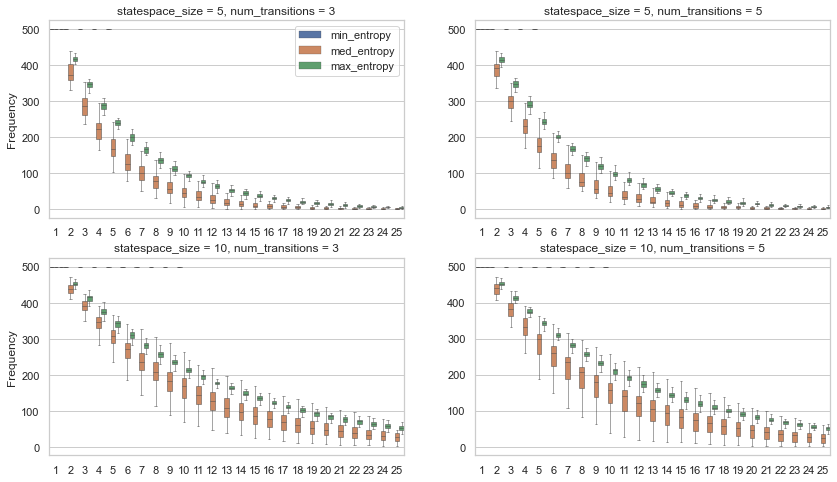

In [79]:
sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2)

whisker = 1.5

lw=0.5
w = 1

"""
subsetting
"""

prefix25 = prefix_all.loc[prefix_all.event_no < 26] 
#prefix25 = prefix25.loc[prefix25.number_of_traces == 100] 

entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "Memoryless" #process_type

"""
Maximum entropy
"""
prefix_plot = prefix25.loc[prefix25.statespace_size == 5]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[0,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[0,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[0,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 5, num_transitions = 3")#, ylim=[0,110])
ax[0,0].legend(loc='upper right')
ax[0,1].set(ylabel='', xlabel='', title="statespace_size = 5, num_transitions = 5")#, ylim=[0,110])
ax[0,1].legend([],[], frameon=False)





"""
Medium entropy
"""

prefix_plot = prefix25.loc[prefix25.statespace_size == 10]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[1,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[1,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[1,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 10, num_transitions = 3")#, ylim=[0,110])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(ylabel='', xlabel='', title="statespace_size = 10, num_transitions = 5")#, ylim=[0,110])
ax[1,1].legend([],[], frameon=False)




#plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

plt.savefig("event_frequency_vs_memoryless.png", dpi=200, bbox_inches = "tight")

fig.show()

# All traces

C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


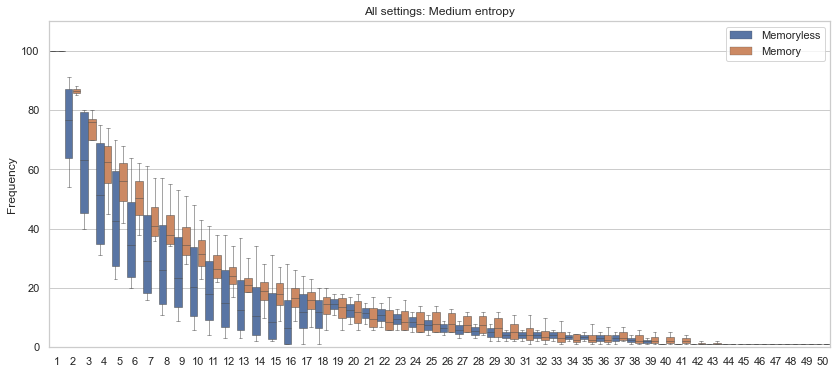

In [21]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.set_style("whitegrid")

fig, ax = plt.subplots()

whisker = 1.5

lw=0.5
w = 1

huevar = "process_type"

prefix_plot = prefix_all.loc[prefix_all.event_no< 51]
prefix_plot = prefix_plot.loc[prefix_plot.process_entropy == "med_entropy"]

#prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot, 
              ax=ax)

ax.set(ylabel='Frequency', xlabel='', title="All settings: Medium entropy", ylim=[0,110])
ax.legend(loc='upper right')

plt.savefig("all_settings_med_entropy.png", dpi=200, bbox_inches = "tight")

## Trace length

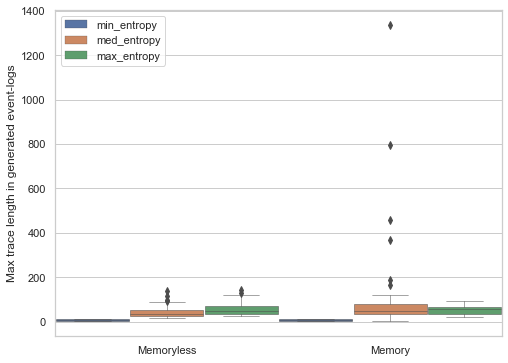

In [125]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style("whitegrid")

fig, ax = plt.subplots()

whisker = 1.5

lw=0.5
w = 1

huevar = "process_entropy"
xvar = "process_type"


sns.boxplot(x=xvar,
            y='max_tracelen',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
            ax=ax,
            data=results)

ax.set(ylabel='Max trace length in generated event-logs', xlabel='', title="")#, ylim=[0,110])
ax.legend(loc='upper left')

plt.savefig("all_settings_max_trace_length.png", dpi=200, bbox_inches = "tight")

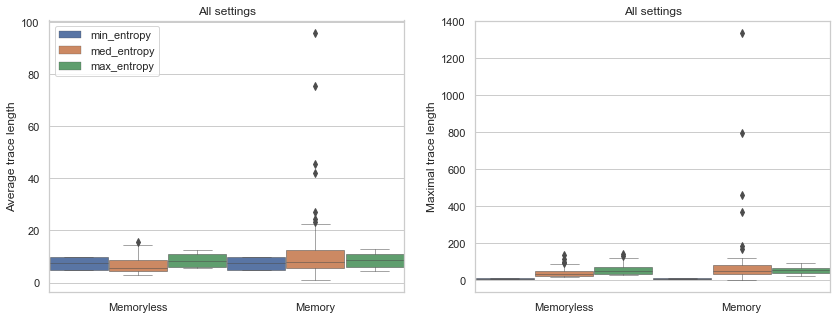

In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(14, 5)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2)

whisker = 1.5

lw=0.5
w = 1


xvar = "process_type"
huevar = "process_entropy"

data = results#.loc[results.event_no < x_limit+1]
#data = data.loc[data.activity_duration_lambda_range == 5]
#data = data.loc[data.process_type == "Memory"]


sns.boxplot(x=xvar, 
            y="avg_tracelen", 
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
             data=data,
              ax=ax[0])

sns.boxplot(x=xvar, 
            y="max_tracelen", 
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = True,
            linewidth=lw,
            whis=whisker,
             data=data,
              ax=ax[1])

#sns.despine()
#ax.set_title("event_no_y_avg: "+variable)


ax[0].set(ylabel='Average trace length', xlabel='', title="All settings")#, ylim=[0,10])
ax[0].legend(loc='upper left')


ax[1].set(ylabel='Maximal trace length', xlabel='', title="All settings")#, ylim=[0,10])
ax[1].legend([],[], frameon=False)


plt.savefig('trace_distribution.png', dpi=200, bbox_inches = "tight")

# Trace duration

In [86]:
results.columns

Index(['process_entropy', 'number_of_traces', 'statespace_size',
       'process_type', 'process_memory', 'med_ent_n_transitions',
       'inter_arrival_time', 'process_stability_scale',
       'resource_availability_p', 'resource_availability_n',
       'resource_availability_m', 'activity_duration_lambda_range',
       'Deterministic_offset_W', 'Deterministic_offset_u', 'model_pipeline',
       'num_replications', 'RUN', 'Done', 'Failure', 'simuation_time_sec',
       'num_traces', 'num_events', 'num_variants', 'avg_tracelen',
       'min_tracelen', 'max_tracelen'],
      dtype='object')

In [87]:
for run in results.RUN:
    #get filename strings
    process_entropy = results.loc[results.RUN==run].process_entropy.values[0]
    process_type = results.loc[results.RUN==run].process_type.values[0]
    
    statespace_size = results.loc[results.RUN==run].statespace_size.values[0] 
    transitions = results.loc[results.RUN==run].med_ent_n_transitions.values[0] 
    process_type = results.loc[results.RUN==run].process_type.values[0] 
    number_of_traces = results.loc[results.RUN==run].number_of_traces.values[0] 
    
    activity_duration_lambda_range = results.loc[results.RUN==run].activity_duration_lambda_range.values[0] 
    
    #load eventlog
    df = pd.read_csv("../results/"+str(run)+"_Eventlog_"+process_entropy+"_"+process_type+".csv")
    
    df["total_duration"] = df["h_t"] + df["b_t"] + df["s_t"] + df["v_t"]
    
    prefix = pd.pivot_table(df, 
                            values='total_duration', 
                            index=['activity_no'], #columns=['activity_no'], 
                            aggfunc=np.mean)

    prefix["event_no"] = prefix.index
    prefix = prefix.reset_index(drop=True)
    prefix = prefix.rename(columns={"total_duration": "Y_avg"})
    
    prefix["Y_avg_log"] = np.log(prefix["Y_avg"])
    
    prefix["transitions"] = transitions
    prefix["process_entropy"] = process_entropy
    prefix["process_type"] = process_type
    prefix["statespace_size"] = statespace_size
    prefix["number_of_traces"] = number_of_traces
    prefix["activity_duration_lambda_range"] = activity_duration_lambda_range
    
    if run == results.RUN[0]:
        prefix_all_duration = prefix
    else:
        prefix_all_duration = pd.concat([prefix_all_duration, prefix],axis=0,ignore_index=True)

prefix_all_duration.to_csv("prefix_all_duration.csv",index=False)
prefix_all_duration

,Y_avg,event_no,Y_avg_log,transitions,process_entropy,process_type,statespace_size,number_of_traces,activity_duration_lambda_range
0,0.869247,1,-0.140127,3.0,min_entropy,Memoryless,5,500.0,1.0
1,0.410804,2,-0.889638,3.0,min_entropy,Memoryless,5,500.0,1.0
2,0.621512,3,-0.475600,3.0,min_entropy,Memoryless,5,500.0,1.0
3,1.472146,4,0.386721,3.0,min_entropy,Memoryless,5,500.0,1.0
4,0.948709,5,-0.052654,3.0,min_entropy,Memoryless,5,500.0,1.0
...,...,...,...,...,...,...,...,...,...
37630,1.598431,61,0.469022,5.0,max_entropy,Memory,10,500.0,5.0
37631,4.188320,62,1.432300,5.0,max_entropy,Memory,10,500.0,5.0
37632,2.556637,63,0.938693,5.0,max_entropy,Memory,10,500.0,5.0
37633,2.916379,64,1.070343,5.0,max_entropy,Memory,10,500.0,5.0


In [88]:
np.max(prefix_all_duration.event_no)

1336

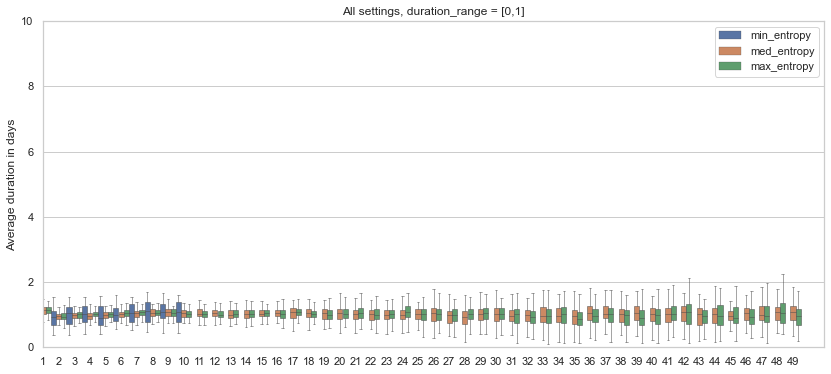

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(14, 6)})
sns.set_style("whitegrid")

fig, ax = plt.subplots()

whisker = 1.5

lw=0.5
w = 1

data = prefix_all_duration.loc[prefix_all_duration.event_no < 50]
data = data.loc[data.activity_duration_lambda_range == 1]
data = data.loc[data.process_type == "Memory"]

sns.boxplot(x="event_no", 
            y="Y_avg", 
            hue="process_entropy",
            ax=ax, 
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
             data=data)

#sns.despine()
#ax.set_title("event_no_y_avg: "+variable)


ax.set(ylabel='Average duration in days', xlabel='', title="All settings, duration_range = [0,1]", ylim=[0,10])
ax.legend(loc='upper right')

#set x axis limits
ax.set(xlim=(0, 50))



#get start and end of x axis limits
#start, end = ax.get_xlim()

#set tick marks on x-axis
#ax.xaxis.set_ticks(np.arange(start, end, 5))

#ax.xaxis.set_ticks(np.arange(start, end, 50))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%")) #".1f ".01f"



fig.savefig('Prefix_all_duration_0_50.png', dpi=200, bbox_inches = "tight")

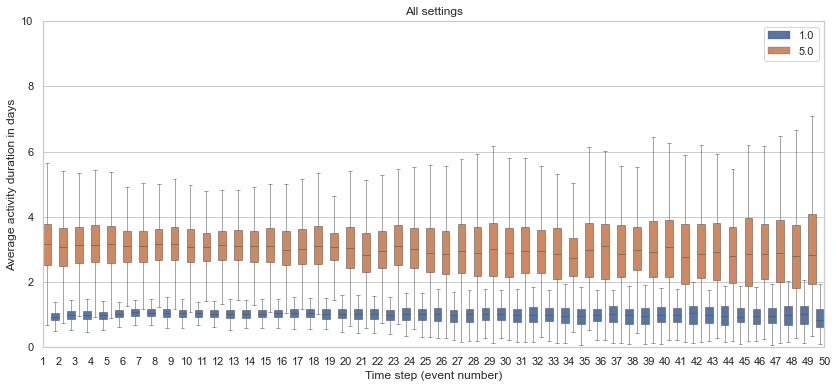

In [180]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(14, 6)})
sns.set_style("whitegrid")

fig, ax = plt.subplots()

whisker = 1.5

lw=0.5
w = 1

data = prefix_all_duration.loc[prefix_all_duration.event_no < 51]
#data = data.loc[data.process_type == "Memory"]

sns.boxplot(x="event_no", 
            y="Y_avg", 
            hue="activity_duration_lambda_range",
            ax=ax, 
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
             data=data)

#sns.despine()
#ax.set_title("event_no_y_avg: "+variable)


ax.set(ylabel='Average activity duration in days', xlabel='Time step (event number)', title="All settings", ylim=[0,10])
ax.legend(loc='upper right')

#set x axis limits
ax.set(xlim=(0, 49))

#get start and end of x axis limits
#start, end = ax.get_xlim()

#set tick marks on x-axis
#ax.xaxis.set_ticks(np.arange(start, end, 5))

#ax.xaxis.set_ticks(np.arange(start, end, 50))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%")) #".1f ".01f"

fig.savefig('Prefix_all_duration_0_50.png', dpi=200, bbox_inches = "tight")

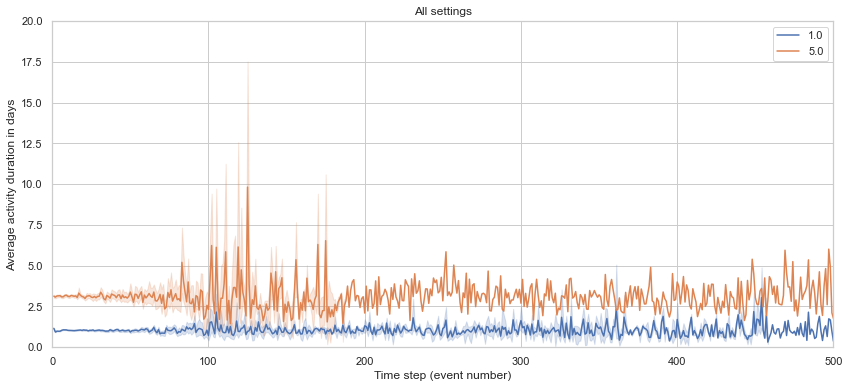

In [193]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(14, 6)})
sns.set_style("whitegrid")

fig, ax = plt.subplots()

whisker = 1.5

ymax = 20

lw=0.5
w = 1
huepalette = sns.color_palette().as_hex()[0:2]

xlim=500

data = prefix_all_duration.loc[prefix_all_duration.event_no < xlim+1]
#data = data.loc[data.process_type == "Memory"]

sns.lineplot(x="event_no", 
            y="Y_avg", 
            hue="activity_duration_lambda_range",
            estimator='mean',
            ci=95,
             palette=huepalette,
             data=data)

#sns.despine()
#ax.set_title("event_no_y_avg: "+variable)


ax.set(ylabel='Average activity duration in days', xlabel='Time step (event number)', title="All settings", ylim=[0,ymax])
ax.legend(loc='upper right')

#set x axis limits
ax.set(xlim=(0, xlim))

#get start and end of x axis limits
#start, end = ax.get_xlim()

#set tick marks on x-axis
#ax.xaxis.set_ticks(np.arange(start, end, 5))

#ax.xaxis.set_ticks(np.arange(start, end, 50))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%")) #".1f ".01f"

fig.savefig('Prefix_all_duration_0_500.png', dpi=200, bbox_inches = "tight")

In [192]:
results.loc[results.max_tracelen > 100, ["activity_duration_lambda_range","max_tracelen","process_type"]]

,activity_duration_lambda_range,max_tracelen,process_type
29,1.0,119,Memoryless
238,1.0,458,Memory
358,5.0,1336,Memory
497,1.0,102,Memoryless
523,1.0,166,Memory
533,5.0,131,Memoryless
538,5.0,121,Memory
610,1.0,796,Memory
667,5.0,187,Memory
694,1.0,366,Memory


In [ ]:
sns.lineplot(x="event_no", 
            y="Y_avg", 
            hue="process_entropy",
            estimator='mean',
            ci=95,
             data=data.loc[data.activity_duration_lambda_range == 1], 
              ax=ax[0])


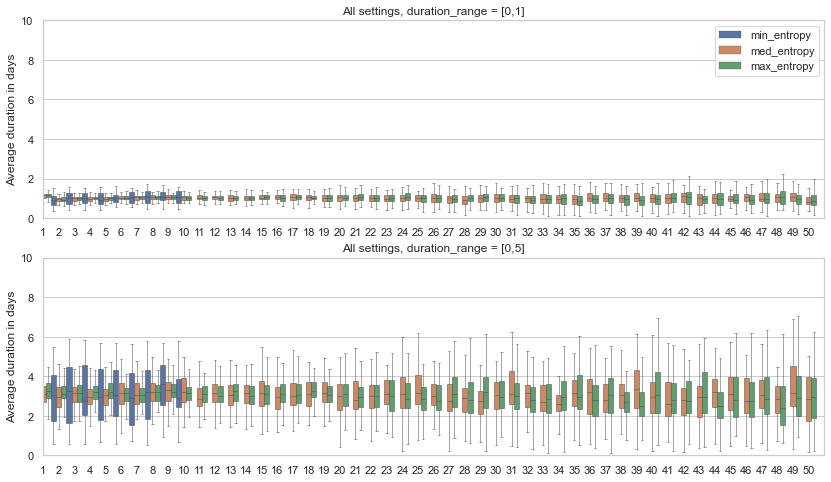

In [140]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,1)

whisker = 1.5

lw=0.5
w = 1

entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "memory" #process_type

"""
Maximum entropy
"""

x_limit = 50

data = prefix_all_duration.loc[prefix_all_duration.event_no < x_limit+1]
#data = data.loc[data.activity_duration_lambda_range == 5]
data = data.loc[data.process_type == "Memory"]


sns.boxplot(x="event_no", 
            y="Y_avg", 
            hue="process_entropy",
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
             data=data.loc[data.activity_duration_lambda_range == 1], 
              ax=ax[0])

sns.boxplot(x="event_no", 
            y="Y_avg", 
            hue="process_entropy",
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
             data=data.loc[data.activity_duration_lambda_range == 5], 
              ax=ax[1])

#sns.despine()
#ax.set_title("event_no_y_avg: "+variable)


ax[0].set(ylabel='Average duration in days', xlabel='', title="All settings, duration_range = [0,1]", ylim=[0,10])
ax[0].legend(loc='upper right')


ax[1].set(ylabel='Average duration in days', xlabel='', title="All settings, duration_range = [0,5]", ylim=[0,10])
ax[1].legend([],[], frameon=False)

#set x axis limits
ax[0].set(xlim=(0, x_limit))
ax[1].set(xlim=(0, x_limit))

plt.savefig('duration_distributions_1.png', dpi=200, bbox_inches = "tight")

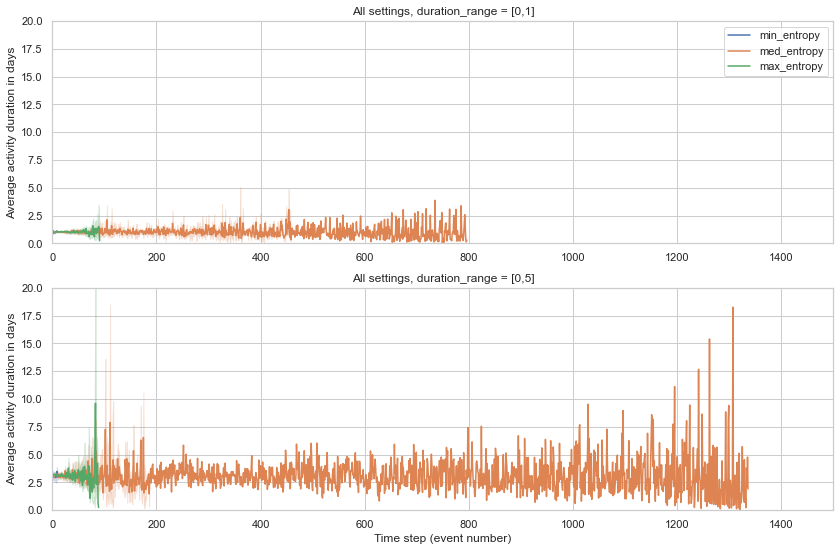

In [141]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(14, 9)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,1)

whisker = 1.5

lw=0.5
w = 1

entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "memory" #process_type

"""
Maximum entropy
"""

x_limit = 1500
y_min = 0
y_max = 20

data = prefix_all_duration.loc[prefix_all_duration.event_no < x_limit+1]
#data = data.loc[data.activity_duration_lambda_range == 5]
data = data.loc[data.process_type == "Memory"]


sns.lineplot(x="event_no", 
            y="Y_avg", 
            hue="process_entropy",
            estimator='mean',
            ci=95,
             data=data.loc[data.activity_duration_lambda_range == 1], 
              ax=ax[0])

sns.lineplot(x="event_no", 
            y="Y_avg", 
            hue="process_entropy",
            estimator='mean',
            ci=95,
             data=data.loc[data.activity_duration_lambda_range == 5], 
              ax=ax[1])

#sns.despine()
#ax.set_title("event_no_y_avg: "+variable)


ax[0].set(ylabel='Average activity duration in days', xlabel='', title="All settings, duration_range = [0,1]", ylim=[y_min,y_max])
ax[0].legend(loc='upper right')


ax[1].set(ylabel='Average activity duration in days', xlabel='Time step (event number)', title="All settings, duration_range = [0,5]", ylim=[y_min,y_max])
ax[1].legend([],[], frameon=False)

#set x axis limits
ax[0].set(xlim=(0, x_limit))
ax[1].set(xlim=(0, x_limit))

plt.savefig('duration_distributions_2.png', dpi=200, bbox_inches = "tight")

# Process models

In [142]:
import pm4py

In [143]:
def convert_log(log):
    import pm4py
    log = log.rename(columns={"caseid":"case:concept:name",
                         "activity":"concept:name",
                         "start_datetime":"time:timestamp"})

    dataframe = pm4py.format_dataframe(log[["case:concept:name","concept:name","time:timestamp"]], 
                                       case_id='case:concept:name', 
                                       activity_key='concept:name', 
                                       timestamp_key='time:timestamp',
                                       timest_format="yyyy-%mm-%dd %hh:%mm:%ss")

    event_log = pm4py.convert_to_event_log(dataframe)
    event_log
    return event_log

In [144]:
controlflow = results.loc[results.process_type == "Memoryless"]

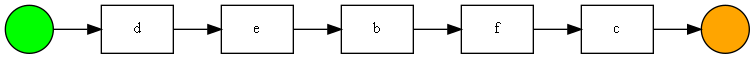

In [145]:
min_e = controlflow.loc[controlflow.process_entropy == "min_entropy"]
min_e.index = list(range(len(min_e)))
settings = min_e.loc[0]
log = pd.read_csv("../results/"+str(settings.RUN)+"_Eventlog_"+settings.process_entropy+"_"+settings.process_type+".csv")
event_log = convert_log(log)
tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_graph = pm4py.convert_to_bpmn(tree)
pm4py.view_bpmn(bpmn_graph)
pm4py.save_vis_bpmn(bpmn_graph,"min_entropy.png")

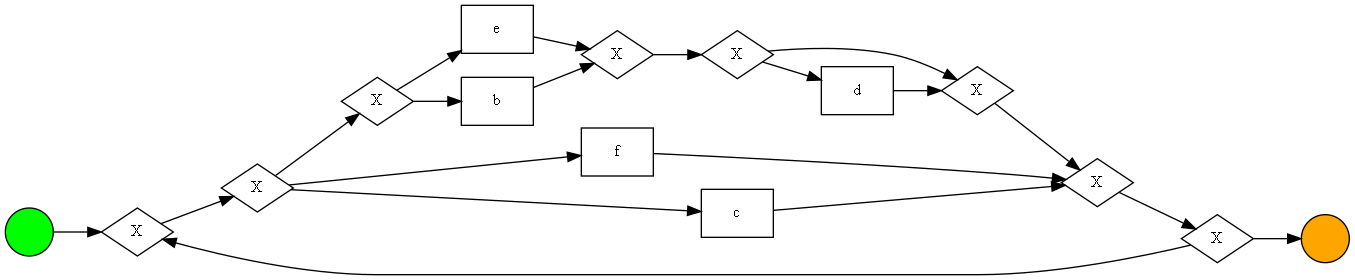

In [146]:
med_e = controlflow.loc[controlflow.process_entropy == "med_entropy"]
med_e.index = list(range(len(med_e)))
settings = med_e.loc[0]
log = pd.read_csv("../results/"+str(settings.RUN)+"_Eventlog_"+settings.process_entropy+"_"+settings.process_type+".csv")
event_log = convert_log(log)
tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_graph = pm4py.convert_to_bpmn(tree)
pm4py.view_bpmn(bpmn_graph)
pm4py.save_vis_bpmn(bpmn_graph,"med_entropy.png")

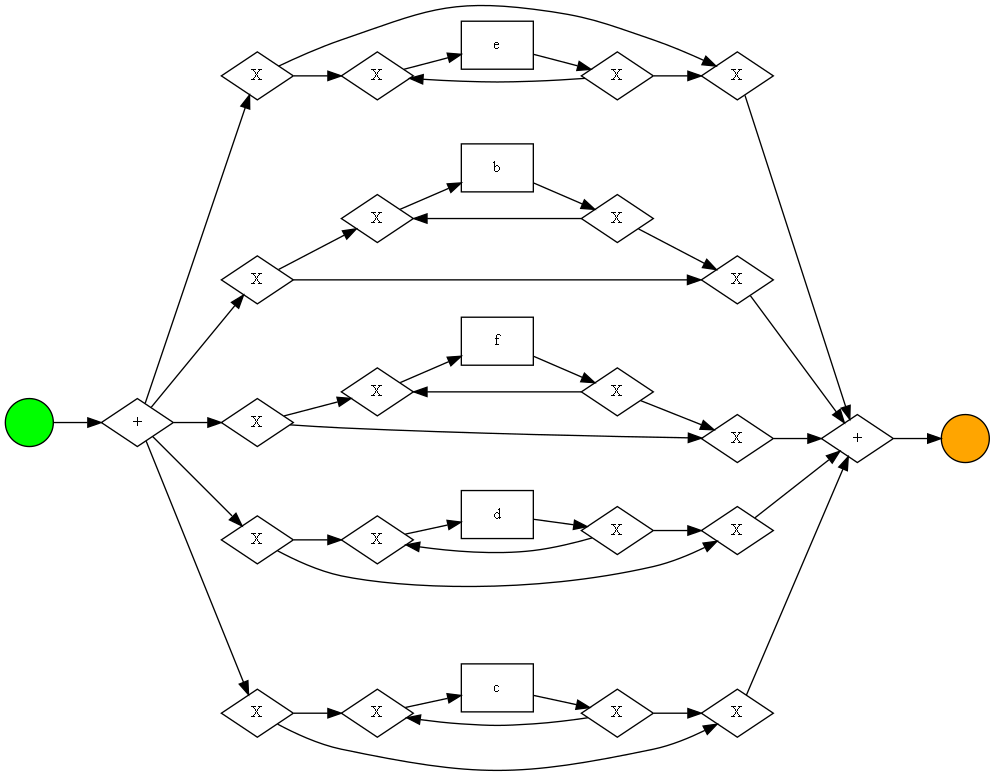

In [147]:
max_e = controlflow.loc[controlflow.process_entropy == "max_entropy"]
max_e.index = list(range(len(max_e)))
settings = max_e.loc[0]
log = pd.read_csv("../results/"+str(settings.RUN)+"_Eventlog_"+settings.process_entropy+"_"+settings.process_type+".csv")
event_log = convert_log(log)
tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_graph = pm4py.convert_to_bpmn(tree)
pm4py.view_bpmn(bpmn_graph)
pm4py.save_vis_bpmn(bpmn_graph,"max_entropy.png")
#plt.savefig("max_entropy.png", dpi=200, bbox_inches = "tight")

# Example table

In [151]:
log

,caseid,activity,activity_no,y_acc_sum,z_t,n_t,q_t,h_t,b_t,s_t,v_t,u_t,starttime,endtime,arrival_datetime,start_datetime,end_datetime,start_day,start_hour
0,0,f,1,0,0.541225,0.541225,0.629052,0.082,0.005827,0.000000,0.097756,0.185583,0.629052,0.726808,2023-01-02 06:59:21,2023-01-02 09:05:50,2023-01-02 11:26:36,Monday,9
1,1,f,1,0,0.557726,0.557726,0.563073,0.000,0.005347,0.000000,0.604507,0.609854,0.563073,1.167580,2023-01-02 07:23:07,2023-01-02 07:30:49,2023-01-02 22:01:18,Monday,7
2,2,f,1,0,4.776600,4.776600,4.868967,0.041,0.051367,0.000000,0.511360,0.603727,4.868967,5.380327,2023-01-06 12:38:18,2023-01-06 14:51:18,2023-01-07 03:07:40,Friday,14
3,2,e,2,0,4.776600,5.380327,5.427113,0.041,0.005786,2.072887,0.114160,2.233833,7.500000,7.614160,2023-01-06 12:38:18,2023-01-09 06:00:00,2023-01-09 08:44:23,Monday,6
4,2,c,3,0,4.776600,7.614160,0.774844,0.082,0.078685,0.000000,0.874952,1.035637,7.774844,8.649797,2023-01-06 12:38:18,2023-01-09 12:35:46,2023-01-10 09:35:42,Monday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,499,e,8,0,753.934278,760.987882,5.313832,0.082,0.243950,2.186168,0.571366,3.083484,763.500000,764.071366,2025-01-25 16:25:21,2025-02-04 05:59:59,2025-02-04 19:42:46,Tuesday,5
2814,499,e,9,0,753.934278,764.071366,1.150386,0.000,0.079020,0.349614,0.837669,1.266303,764.500000,765.337669,2025-01-25 16:25:21,2025-02-05 06:00:00,2025-02-06 02:06:14,Wednesday,6
2815,499,b,10,0,753.934278,765.337669,2.482512,0.041,0.103843,0.017488,0.941434,1.103765,765.500000,766.441434,2025-01-25 16:25:21,2025-02-06 06:00:00,2025-02-07 04:35:39,Thursday,6
2816,499,f,11,0,753.934278,766.441434,3.951156,0.123,0.386722,0.000000,0.635197,1.144919,766.951156,767.586353,2025-01-25 16:25:21,2025-02-07 16:49:39,2025-02-08 08:04:20,Friday,16


In [158]:
table_example = log.loc[log.caseid==2]
table_example.rename({"activity_no":"t"},axis=1,inplace=True)
table_example = table_example.drop(["y_acc_sum"],axis=1) #"start_day","start_hour"

table_example.n_t = np.round(table_example.n_t,2)
table_example.u_t = np.round(table_example.u_t,2)
table_example.z_t = np.round(table_example.z_t,2)
table_example.b_t = np.round(table_example.b_t,2)
table_example.q_t = np.round(table_example.q_t,2)
table_example.s_t = np.round(table_example.s_t,2)
table_example.v_t = np.round(table_example.v_t,2)

table_example1 = table_example.drop(["arrival_datetime","start_datetime","end_datetime","starttime","endtime","start_hour","start_day"],axis=1)
table_example2 = table_example[["caseid","activity","t","arrival_datetime","start_datetime","end_datetime","start_day"]]

table_example1

C:\Users\Mike\AppData\Local\Temp\ipykernel_39100\3050957535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_example.rename({"activity_no":"t"},axis=1,inplace=True)


,caseid,activity,t,z_t,n_t,q_t,h_t,b_t,s_t,v_t,u_t
2,2,f,1,4.78,4.78,4.87,0.041,0.05,0.00,0.51,0.60
3,2,e,2,4.78,5.38,5.43,0.041,0.01,2.07,0.11,2.23
4,2,c,3,4.78,7.61,0.77,0.082,0.08,0.00,0.87,1.04


In [159]:
table_example2

,caseid,activity,t,arrival_datetime,start_datetime,end_datetime,start_day
2,2,f,1,2023-01-06 12:38:18,2023-01-06 14:51:18,2023-01-07 03:07:40,Friday
3,2,e,2,2023-01-06 12:38:18,2023-01-09 06:00:00,2023-01-09 08:44:23,Monday
4,2,c,3,2023-01-06 12:38:18,2023-01-09 12:35:46,2023-01-10 09:35:42,Monday


In [160]:
print(table_example1.to_latex(index=False))

\begin{tabular}{rlrrrrrrrrr}
\toprule
 caseid & activity &  t &  z\_t &  n\_t &  q\_t &   h\_t &  b\_t &  s\_t &  v\_t &  u\_t \\
\midrule
      2 &        f &  1 & 4.78 & 4.78 & 4.87 & 0.041 & 0.05 & 0.00 & 0.51 & 0.60 \\
      2 &        e &  2 & 4.78 & 5.38 & 5.43 & 0.041 & 0.01 & 2.07 & 0.11 & 2.23 \\
      2 &        c &  3 & 4.78 & 7.61 & 0.77 & 0.082 & 0.08 & 0.00 & 0.87 & 1.04 \\
\bottomrule
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_39100\3248784663.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_example1.to_latex(index=False))


In [161]:
print(table_example2.to_latex(index=False))

\begin{tabular}{rlrllll}
\toprule
 caseid & activity &  t &    arrival\_datetime &      start\_datetime &        end\_datetime & start\_day \\
\midrule
      2 &        f &  1 & 2023-01-06 12:38:18 & 2023-01-06 14:51:18 & 2023-01-07 03:07:40 &    Friday \\
      2 &        e &  2 & 2023-01-06 12:38:18 & 2023-01-09 06:00:00 & 2023-01-09 08:44:23 &    Monday \\
      2 &        c &  3 & 2023-01-06 12:38:18 & 2023-01-09 12:35:46 & 2023-01-10 09:35:42 &    Monday \\
\bottomrule
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_39100\1344654725.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_example2.to_latex(index=False))
